In [69]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit import BasicAer 
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp

In [70]:
final_circuit = QuantumCircuit(5)

In [71]:
final_circuit.h([0,1,2,3,4])

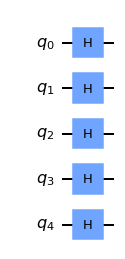

In [72]:
final_circuit.draw('mpl')

In [73]:
diagonal1 = Statevector.from_label('11011')
diagonal1_circuit = Diagonal((-1)**diagonal1.data)
final_circuit.append(diagonal1_circuit, [0,1,2,3,4])

In [74]:
diagonal2 = Statevector.from_label('11110')
diagonal2_circuit = Diagonal((-1)**diagonal2.data)
final_circuit.append(diagonal2_circuit, [0,1,2,3,4])

In [75]:
diagonal3 = Statevector.from_label('11001')
diagonal3_circuit = Diagonal((-1)**diagonal3.data)
final_circuit.append(diagonal3_circuit, [0,1,2,3,4])

In [76]:
diagonal4 = Statevector.from_label('11010')
diagonal4_circuit = Diagonal((-1)**diagonal4.data)
final_circuit.append(diagonal4_circuit, [0,1,2,3,4])

In [77]:
diagonal5 = Statevector.from_label('11000')
diagonal5_circuit = Diagonal((-1)**diagonal5.data)
final_circuit.append(diagonal5_circuit, [0,1,2,3,4])

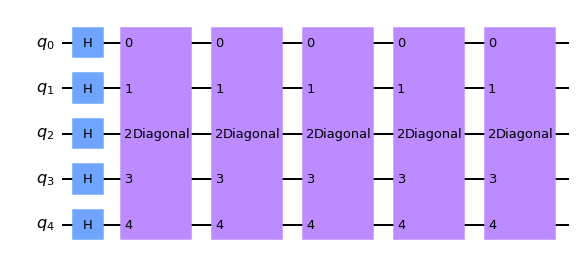

In [78]:
final_circuit.draw('mpl')

In [79]:
final_circuit.h([0,1,2,3,4])
final_circuit.x([0,1,2,3,4])

final_circuit.h(4)
final_circuit.mct([0,1,2,3], 4) 
final_circuit.h(4)

final_circuit.x([0,1,2,3,4])
final_circuit.h([0,1,2,3,4])


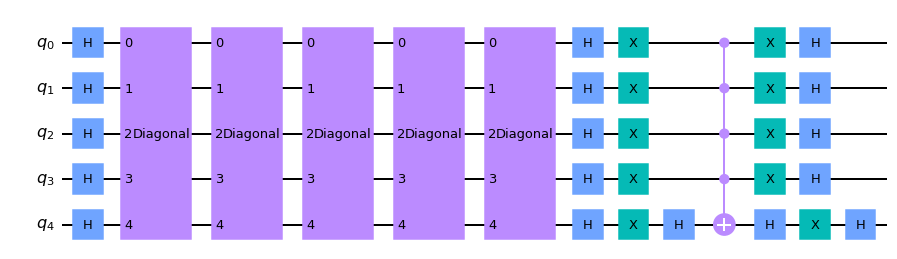

In [80]:
final_circuit.draw('mpl')

In [81]:
statevector_sim = Aer.get_backend('statevector_simulator')
job = execute(final_circuit, statevector_sim)
result = job.result()
sv = result.get_statevector()
print(sv)

Statevector([-0.06629126-2.55488674e-16j, -0.06629126-1.87279179e-16j,
             -0.06629126-2.36569983e-16j, -0.06629126-2.27341086e-16j,
             -0.06629126-2.24605013e-16j, -0.06629126-1.87620541e-16j,
             -0.06629126-2.52051875e-16j, -0.06629126-2.25475744e-16j,
             -0.06629126-2.01484308e-16j, -0.06629126-1.90835081e-16j,
             -0.06629126-2.33685459e-16j, -0.06629126-2.59770719e-16j,
             -0.06629126-1.85128148e-16j, -0.06629126-2.97329894e-16j,
             -0.06629126-2.32700348e-16j, -0.06629126-2.40818686e-16j,
             -0.06629126-1.81831814e-16j, -0.06629126-1.89950152e-16j,
             -0.06629126-1.60459853e-16j, -0.06629126-1.99803214e-16j,
             -0.06629126-1.64831804e-16j, -0.06629126-2.11114058e-16j,
             -0.06629126-1.06128146e-16j, -0.06629126-2.17497673e-16j,
             -0.41984465-1.11510885e-15j, -0.41984465-1.17346388e-15j,
             -0.41984465-1.16215304e-15j, -0.41984465-1.16069526e-15j,
      

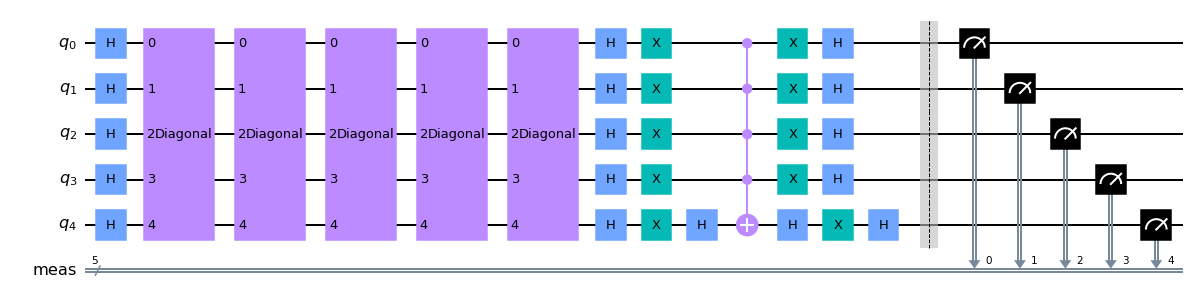

In [82]:
final_circuit.measure_all()
final_circuit.draw('mpl')

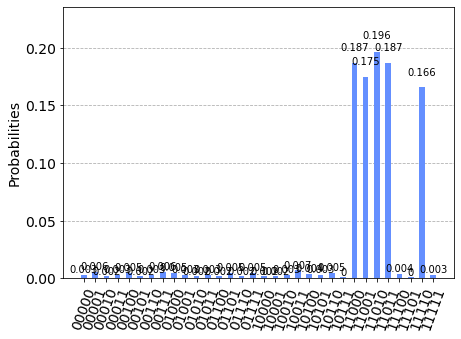

In [83]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_final_circuit = transpile(final_circuit, aer_sim)
qobj = assemble(transpiled_final_circuit)
outputs = aer_sim.run(qobj).result()
counts = outputs.get_counts()
plot_histogram(counts)